<a href="https://colab.research.google.com/github/Lena-1027/Singeorzan-Lenuta-Lab1/blob/master/DEEP_LEARNING_ESAME_CODICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install and import libraries+ excel files from SemEval zip



In [ ]:
!pip install -q tensorflow pandas scikit-learn openpyxl matplotlib

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
# the libraries are needed to built LSTM


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#they are installed for SVM

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
np.random.seed(42) #they are needed for reproducibility
tf.random.set_seed(42)

In [ ]:
from google.colab import files #import the excel file.zip

uploaded = files.upload()


Saving TRAIN_RELEASE_3SEP2025.zip to TRAIN_RELEASE_3SEP2025.zip


In [ ]:
import zipfile #unzip it

zip_file_name = 'TRAIN_RELEASE_3SEP2025.zip'

with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('.')

print(f"'{zip_file_name}' unzipped successfully to current directory.")

'TRAIN_RELEASE_3SEP2025.zip' unzipped successfully to current directory.


In [ ]:
import os

print("Files in the extracted folder:") #all files are extracted
for file in os.listdir('TRAIN_RELEASE_3SEP2025'):
    print(f"  - {file}")

Files in the extracted folder:
  - train_subtask2b_user_disposition_change.csv
  - train_subtask2a.csv
  - train_subtask2b_detailed.csv
  - .DS_Store
  - train_subtask2b.csv
  - train_subtask1.csv


## Identify Excel File and Load Subtask1 Data


In [ ]:
csv_file_path = os.path.join('TRAIN_RELEASE_3SEP2025', 'train_subtask1.csv')
df_subtask1 = pd.read_csv(csv_file_path) #df=dataframe we verify if the data is read without errros

print("First 10 rows of subtask1:")
print(df_subtask1.head(10)) # head allow to see the data in the excel files

print("\nDataFrame Info for subtask1:")
df_subtask1.info() # is used to check if values are missing

First 10 rows of subtask1:
   user_id  text_id                                               text  \
0        3      251  I ' ve been feeling just fine . Nice and relax...   
1        3      252  I ' ve been feeling pretty good . This is my l...   
2        3      253  Still feeling sick today and sneezing alot wit...   
3        3      254  I ' m still feeling kinda sickly but I powered...   
4        3      255  I ' m feeling so much better today ! Seems lik...   
5        7      347  I have been feeling somewhat down . I am tryin...   
6        7      348  The last day has been much better than yesterd...   
7       10      407         Tired , Exhausted , Calm , Content , Happy   
8       10      408           Content , Calm , Sleepy , Lazy , Relaxed   
9       10      409                   Content , Calm , Relaxed , Happy   

             timestamp  collection_phase  is_words  valence  arousal  
0  2021-06-08 12:26:16                 1     False      1.0      1.0  
1  2021-06-09 13

## Load and Inspect Subtask2a Data



In [ ]:
csv_file_path = os.path.join('TRAIN_RELEASE_3SEP2025', 'train_subtask2a.csv')
df_subtask2a = pd.read_csv(csv_file_path) #df=dataframe we verify if the data is read without erros

print("First 10 rows of subtask2a:")
print(df_subtask2a.head(10)) # head allow to see the data in the excel files

print("\nDataFrame Info for subtask2a:")
df_subtask2a.info() # is used to check if values are missing

First 10 rows of subtask2a:
   user_id  text_id                                               text  \
0        1      200  I feel good .   I caught up on some sleep . Wo...   
1        1      201  I’ve been feeling good for days and days . I r...   
2        1      202  I’ve been feeling fine personally . I’ve been ...   
3        1      203  I feel great . I’ve had a day off . I’m going ...   
4        1      204  I feel great today . I am well rested . I have...   
5        2       23       Productive , Tired , Active , Pleased , Busy   
6        2       24                        Productive , Busy , Content   
7        2       25           Relaxed , Content , Comfy , Happy , Calm   
8        2       22             Productive , Relaxed , Happy , Content   
9        2       34       Relaxed , Rested , Happy , Pleased , Content   

             timestamp  collection_phase  is_words  valence  arousal  \
0  2021-06-09 12:41:57                 1     False      2.0      1.0   
1  2021-06-11

## Load and Inspect Subtask2b Data



In [ ]:
csv_file_path_2b = os.path.join('TRAIN_RELEASE_3SEP2025', 'train_subtask2b.csv')
df_subtask2b = pd.read_csv(csv_file_path_2b) #df=dataframe we verify if the data is read without errros

print("First 10 rows of subtask2b:")
print(df_subtask2b.head(10)) # head allow to see the data in the excel files

print("\nDataFrame Info for subtask2b:")
df_subtask2b.info() # is used to check if values are missing

First 10 rows of subtask2b:
   user_id  text_id                                               text  \
0        1      200  I feel good .   I caught up on some sleep . Wo...   
1        1      201  I’ve been feeling good for days and days . I r...   
2        1      202  I’ve been feeling fine personally . I’ve been ...   
3        1      203  I feel great . I’ve had a day off . I’m going ...   
4        1      204  I feel great today . I am well rested . I have...   
5        2       23       Productive , Tired , Active , Pleased , Busy   
6        2       24                        Productive , Busy , Content   
7        2       25           Relaxed , Content , Comfy , Happy , Calm   
8        2       22             Productive , Relaxed , Happy , Content   
9        2       34       Relaxed , Rested , Happy , Pleased , Content   

             timestamp  valence  arousal  group  disposition_change_valence  \
0  2021-06-09 12:41:57      2.0      1.0      1                    0.666667   

# Data exploring+cleaning



 convert the timestamp column in all three dataframes to datetime objects => time-series analysis+to have the text in chronological order



In [ ]:
#for each subtask we convert to datetime since we are analysing a time series model (plus timestap refers to a general string and we need to be specific)
df_subtask1['timestamp'] = pd.to_datetime(df_subtask1['timestamp'])
df_subtask2a['timestamp'] = pd.to_datetime(df_subtask2a['timestamp'])
df_subtask2b['timestamp'] = pd.to_datetime(df_subtask2b['timestamp'])

 take the length of the text column for each row in the subtasks and store it in a new column named text_length=> numericl feature (in this way the models will be able to identify long and short texts)


In [ ]:
#for ML having numerical features allow to process the data and the lenght of the text may give more informations related to valence and arousal
df_subtask1['text_length'] = df_subtask1['text'].str.len()
df_subtask2a['text_length'] = df_subtask2a['text'].str.len()
df_subtask2b['text_length'] = df_subtask2b['text'].str.len()

#Descriptive statistic

Then, is important to investigate the Descriptive statistics for specific columns in the dataframes to understand their distributions and basic properties.(important for the written part especially for subtask 1= arousal and valence, subtask 2a= state change and subtask 2b= disposition change)



SUBTASK 1 DESCRIPTIVE STATISTICS

In [ ]:
#descriptive statustic to undertand the values, spread and rage of numbers
print("\nDescriptive statistics for df_subtask1:")
print(df_subtask1[['valence', 'arousal', 'text_length']].describe())



Descriptive statistics for df_subtask1:
           valence      arousal  text_length
count  2764.000000  2764.000000  2764.000000
mean      0.216715     0.751085   158.581404
std       1.292142     0.753985   152.493089
min      -2.000000     0.000000    18.000000
25%      -1.000000     0.000000    43.000000
50%       0.000000     1.000000    56.000000
75%       1.000000     1.000000   244.000000
max       2.000000     2.000000  1105.000000


SUBTASK 2a- 2B DESCRIPTIVE STATISTICS

In [ ]:
print("\nDescriptive statistics for df_subtask2a:")
print(df_subtask2a[['valence', 'arousal', 'text_length']].describe())

print("\nDescriptive statistics for df_subtask2b:")
print(df_subtask2b[['valence', 'arousal', 'text_length']].describe())


Descriptive statistics for df_subtask2a:
           valence      arousal  text_length
count  2764.000000  2764.000000  2764.000000
mean      0.216715     0.751085   158.581404
std       1.292142     0.753985   152.493089
min      -2.000000     0.000000    18.000000
25%      -1.000000     0.000000    43.000000
50%       0.000000     1.000000    56.000000
75%       1.000000     1.000000   244.000000
max       2.000000     2.000000  1105.000000

Descriptive statistics for df_subtask2b:
           valence      arousal  text_length
count  2764.000000  2764.000000  2764.000000
mean      0.216715     0.751085   158.581404
std       1.292142     0.753985   152.493089
min      -2.000000     0.000000    18.000000
25%      -1.000000     0.000000    43.000000
50%       0.000000     1.000000    56.000000
75%       1.000000     1.000000   244.000000
max       2.000000     2.000000  1105.000000


Histograms for each subtask are created to see how the distribution looks( the focus is mainly on arousal, valence, state change and siposition change)

SUBTASK1

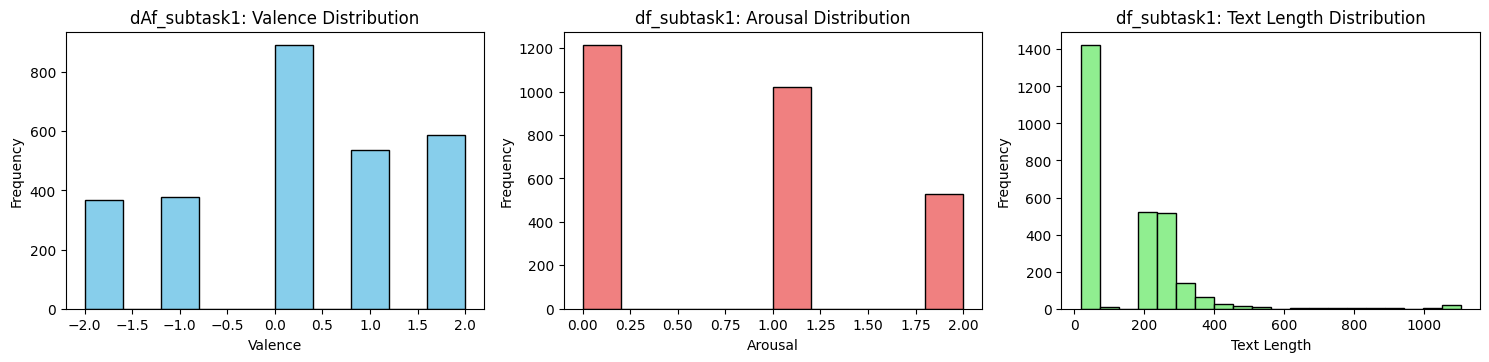

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
plt.hist(df_subtask1['valence'], bins=10, color='skyblue', edgecolor='black')
plt.title('dAf_subtask1: Valence Distribution')
plt.xlabel('Valence')
plt.ylabel('Frequency')

plt.subplot(3, 3, 2)
plt.hist(df_subtask1['arousal'], bins=10, color='lightcoral', edgecolor='black')
plt.title('df_subtask1: Arousal Distribution')
plt.xlabel('Arousal')
plt.ylabel('Frequency')

plt.subplot(3, 3, 3)
plt.hist(df_subtask1['text_length'], bins=20, color='lightgreen', edgecolor='black')
plt.title('df_subtask1: Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

SUBTASK 2A-2B

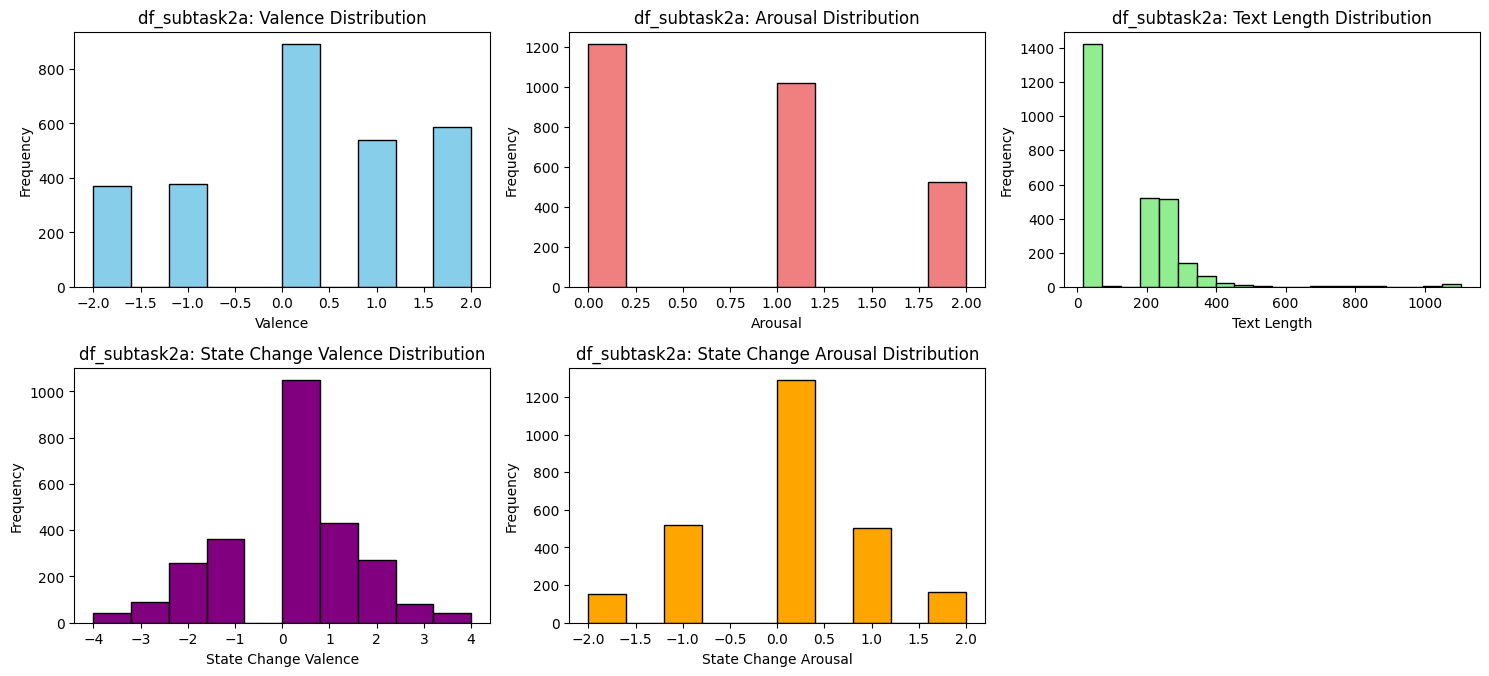

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(15, 10))

# Histograms for df_subtask2a
plt.subplot(3, 3, 4)
plt.hist(df_subtask2a['valence'], bins=10, color='skyblue', edgecolor='black')
plt.title('df_subtask2a: Valence Distribution')
plt.xlabel('Valence')
plt.ylabel('Frequency')

plt.subplot(3, 3, 5)
plt.hist(df_subtask2a['arousal'], bins=10, color='lightcoral', edgecolor='black')
plt.title('df_subtask2a: Arousal Distribution')
plt.xlabel('Arousal')
plt.ylabel('Frequency')

plt.subplot(3, 3, 6)
plt.hist(df_subtask2a['text_length'], bins=20, color='lightgreen', edgecolor='black')
plt.title('df_subtask2a: Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.subplot(3, 3, 7)
plt.hist(df_subtask2a['state_change_valence'].dropna(), bins=10, color='purple', edgecolor='black')
plt.title('df_subtask2a: State Change Valence Distribution')
plt.xlabel('State Change Valence')
plt.ylabel('Frequency')

plt.subplot(3, 3, 8)
plt.hist(df_subtask2a['state_change_arousal'].dropna(), bins=10, color='orange', edgecolor='black')
plt.title('df_subtask2a: State Change Arousal Distribution')
plt.xlabel('State Change Arousal')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))


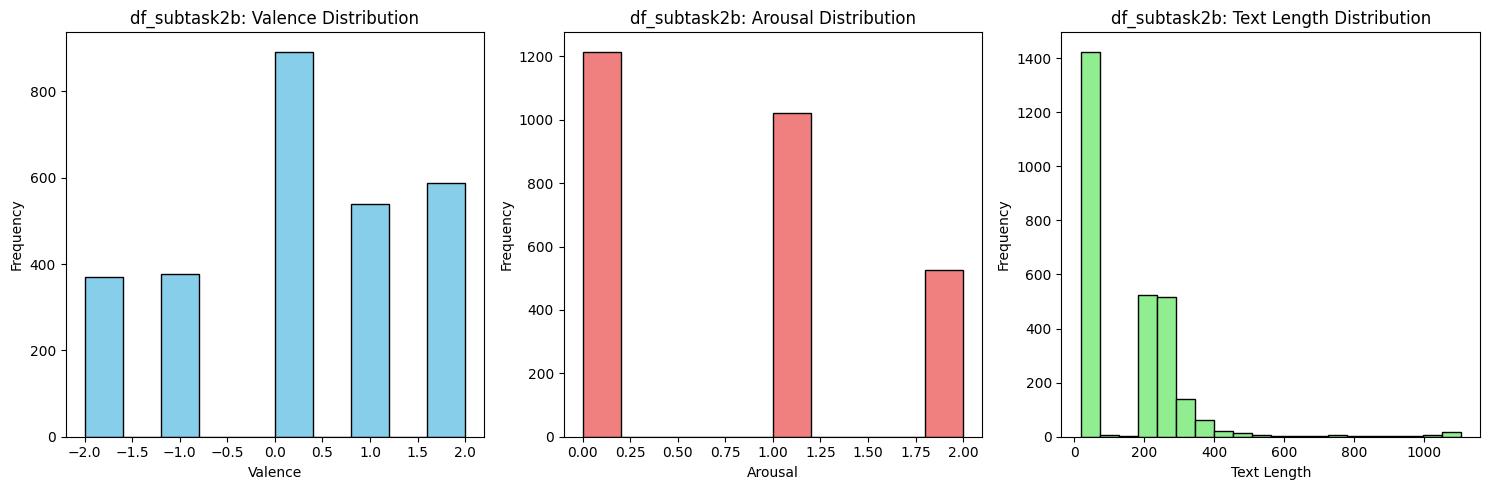

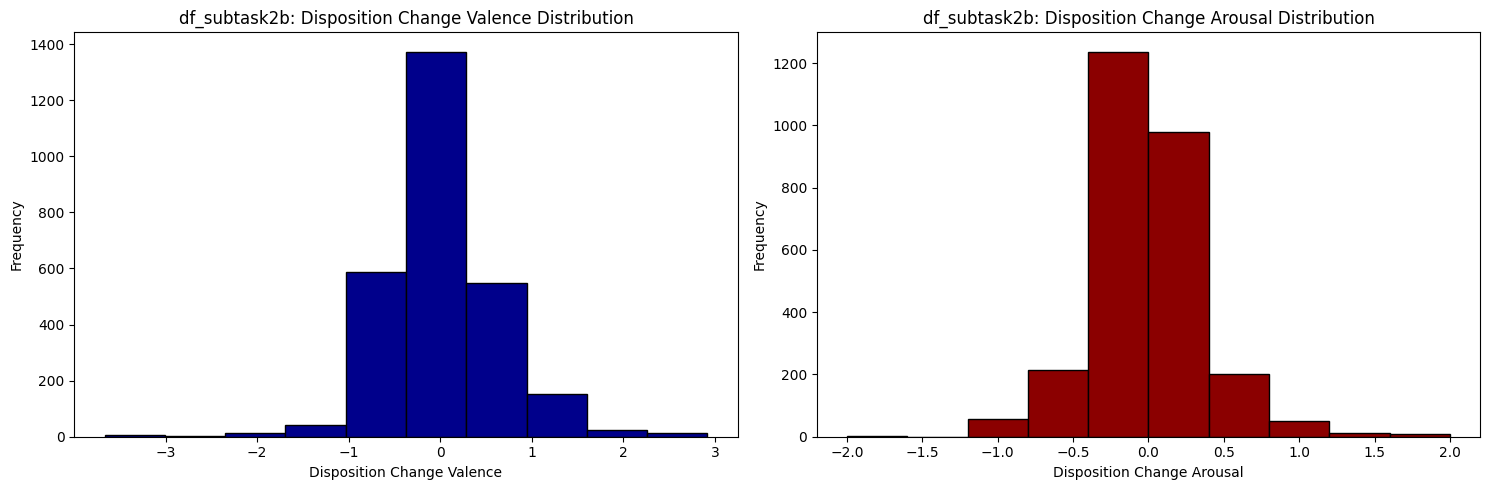

In [ ]:
plt.figure(figsize=(15, 5))
# Histograms for df_subtask2b
plt.subplot(1, 3, 1)
plt.hist(df_subtask2b['valence'], bins=10, color='skyblue', edgecolor='black')
plt.title('df_subtask2b: Valence Distribution')
plt.xlabel('Valence')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df_subtask2b['arousal'], bins=10, color='lightcoral', edgecolor='black')
plt.title('df_subtask2b: Arousal Distribution')
plt.xlabel('Arousal')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df_subtask2b['text_length'], bins=20, color='lightgreen', edgecolor='black')
plt.title('df_subtask2b: Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(df_subtask2b['disposition_change_valence'], bins=10, color='darkblue', edgecolor='black')
plt.title('df_subtask2b: Disposition Change Valence Distribution')
plt.xlabel('Disposition Change Valence')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_subtask2b['disposition_change_arousal'], bins=10, color='darkred', edgecolor='black')
plt.title('df_subtask2b: Disposition Change Arousal Distribution')
plt.xlabel('Disposition Change Arousal')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


For all the subtask the unique users are gonna be counted= with the aim to be able to detect the total number of users present in each subtask, togheter with  entries per user= The aim is to see which users have contributed the most with the entries/rows, and compute the average valence and arousal per user= in order to be able to see the emotional tendecies that may occur



SUBTASK 1

In [ ]:
print("\n--- User-specific patterns for df_subtask1 ---")
print(f"Unique users: {df_subtask1['user_id'].nunique()}") #total number of users
print("Entries per user:\n", df_subtask1['user_id'].value_counts().head())#number of lines calculated in user_id and the most popular are showed
print("Average valence and arousal per user:\n", df_subtask1.groupby('user_id')[['valence', 'arousal']].mean().head()) #this for v and a



--- User-specific patterns for df_subtask1 ---
Unique users: 137
Entries per user:
 user_id
40    206
2     177
33    108
17    105
38     97
Name: count, dtype: int64
Average valence and arousal per user:
           valence   arousal
user_id                    
1        1.600000  1.200000
2        0.954802  0.265537
3        1.000000  1.000000
4        0.375000  0.750000
6        0.047619  0.809524


SUBTASK 2A-2B

In [ ]:

print("\n--- User-specific patterns for df_subtask2a ---")
print(f"Unique users: {df_subtask2a['user_id'].nunique()}")  #total number of users
print("Entries per user:\n", df_subtask2a['user_id'].value_counts().head()) #number of lines calculated in user_id and the most popular are showed
print("Average valence and arousal per user:\n", df_subtask2a.groupby('user_id')[['valence', 'arousal']].mean().head()) #valence and arousal calculated

print("\n--- User-specific patterns for df_subtask2b ---") #SUBTASK2B
print(f"Unique users: {df_subtask2b['user_id'].nunique()}")  #total number of users
print("Entries per user:\n", df_subtask2b['user_id'].value_counts().head()) #number of lines calculated in user_id and the most popular are showed
print("Average valence and arousal per user:\n", df_subtask2b.groupby('user_id')[['valence', 'arousal']].mean().head()) #valence and arousal calculated



--- User-specific patterns for df_subtask2a ---
Unique users: 137
Entries per user:
 user_id
40    206
2     177
33    108
17    105
38     97
Name: count, dtype: int64
Average valence and arousal per user:
           valence   arousal
user_id                    
1        1.600000  1.200000
2        0.954802  0.265537
3        1.000000  1.000000
4        0.375000  0.750000
6        0.047619  0.809524

--- User-specific patterns for df_subtask2b ---
Unique users: 137
Entries per user:
 user_id
40    206
2     177
33    108
17    105
38     97
Name: count, dtype: int64
Average valence and arousal per user:
           valence   arousal
user_id                    
1        1.600000  1.200000
2        0.954802  0.265537
3        1.000000  1.000000
4        0.375000  0.750000
6        0.047619  0.809524


In the subtask 2a there are missing values that need to be identified (Nan) in state_change for both arousal and valence. In the case there are no last entry to compare for the next one is gonna be inserted Nan (SemVal)

In [ ]:
nan_state_changes_df = df_subtask2a[df_subtask2a['state_change_valence'].isna() | df_subtask2a['state_change_arousal'].isna()]
print(f"Total rows with NaN in state_change_valence/arousal': {len(nan_state_changes_df)}")# analyse which values are missing (NaN)

df_subtask2a_sorted = df_subtask2a.sort_values(by=['user_id', 'timestamp'])# we need to sort the task into users and time, especially since we need the last value to compare the changes

last_entries_per_user = df_subtask2a_sorted.groupby('user_id').last().reset_index()# the last entry of each user is obtained

nan_in_last_entry_valence = last_entries_per_user['state_change_valence'].isna().sum()# Check if these last entries have any missing value
nan_in_last_entry_arousal = last_entries_per_user['state_change_arousal'].isna().sum()

print(f"Number of users whose last entry has NaN in state_change_valence: {nan_in_last_entry_valence}")
print(f"Number of users whose last entry has NaN in state_change_arousal: {nan_in_last_entry_arousal}")

nan_last_entries_sample = last_entries_per_user[  # show where there are Nans in the state change for users and if not not =NOT FOUND
    last_entries_per_user['state_change_valence'].isna() |
    last_entries_per_user['state_change_arousal'].isna()
]
if not nan_last_entries_sample.empty:
    print("\nSample of last entries with NaN state changes:")
    print(nan_last_entries_sample[['user_id', 'timestamp', 'state_change_valence', 'state_change_arousal']].head())
else:
    print("\nNo last entries found with NaN state changes.")

Total rows with NaN in state_change_valence/arousal': 137
Number of users whose last entry has NaN in state_change_valence: 0
Number of users whose last entry has NaN in state_change_arousal: 0

No last entries found with NaN state changes.


next step related to the identification of the group 1 and the group 2 for the Subtask 2b through the identification of unique values (Semval)



In [ ]:
print("\n--- Analysis of group column in df_subtask2b ---")
print("Unique values and their counts in group column:")
print(df_subtask2b['group'].value_counts())


--- Analysis of 'group' column in df_subtask2b ---
Unique values and their counts in 'group' column:
group
1    1417
2    1347
Name: count, dtype: int64


standardize and simplify texts-> through the function clean_text remove extra whitespace,remove characters like !,? and covert the text in oder to not have capitular letters like L, M but l, m



In [ ]:
import re

def clean_text(text):
    text = str(text).lower()  # Convert to string and lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters and numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

In [ ]:
df_subtask1['text'] = df_subtask1['text'].apply(clean_text) #apply the clean_text function to all subtask
df_subtask2a['text'] = df_subtask2a['text'].apply(clean_text)
df_subtask2b['text'] = df_subtask2b['text'].apply(clean_text)

#Prepare Data Splits for Subtask 1
Split the  data into training, validation, and test sets ( the test set includes data from unseen users and seen users.(80%-20%))


In [ ]:
from sklearn.model_selection import train_test_split

UNSEEN_USER_PERCENTAGE = 0.20 #those useers are gonna be used only for the final test and they will be seen as new ones. The aim is to simulate a real situation and to see how the model handle it
SEEN_USER_TEST_SPLIT_RATIO = 0.20 #seen are the ones present in training with the aim to see if it is possible to forecast the future correctly
SEEN_USER_VAL_SPLIT_RATIO = 0.20 # those one are present in the validation with th aim to choose the best parameters and to obtain the desider results

print(f"UNSEEN_USER_PERCENTAGE: {UNSEEN_USER_PERCENTAGE}")
print(f"SEEN_USER_TEST_SPLIT_RATIO: {SEEN_USER_TEST_SPLIT_RATIO}")
print(f"SEEN_USER_VAL_SPLIT_RATIO: {SEEN_USER_VAL_SPLIT_RATIO}")

unique_user_ids = df_subtask1['user_id'].unique() # all unique users of subtask 1 are extracted
print(f"Total unique users: {len(unique_user_ids)}")

seen_user_ids, unseen_user_ids = train_test_split( # in there the users are split into seen and unseen
    unique_user_ids,
    test_size=UNSEEN_USER_PERCENTAGE,
    random_state=42 #seen users are the ones used for training, validation and test while unseen for the final step
)
print(f"Number of seen users: {len(seen_user_ids)}")
print(f"Number of unseen users: {len(unseen_user_ids)}")

df_test_unseen_users = df_subtask1[df_subtask1['user_id'].isin(unseen_user_ids)].copy()
print(f"Shape of df_test_unseen_users: {df_test_unseen_users.shape}") #unseen are prepared but only at the end we will see them

df_seen_users_data = df_subtask1[df_subtask1['user_id'].isin(seen_user_ids)].copy()
print(f"Shape of df_seen_users_data: {df_seen_users_data.shape}") #they are gonna be used from training

train_val_seen_data_list = [] #validation set
test_seen_data_list = [] #training set

for user_id in seen_user_ids:
    user_data = df_seen_users_data[df_seen_users_data['user_id'] == user_id].sort_values(by='timestamp') #for each user we apply a chronological order for the data


    split_idx_test = int(len(user_data) * (1 - SEEN_USER_TEST_SPLIT_RATIO)) # then we split the users into validation and test

    train_val_seen_data_list.append(user_data.iloc[:split_idx_test])
    test_seen_data_list.append(user_data.iloc[split_idx_test:])


df_train_val_seen = pd.concat(train_val_seen_data_list) #concatenate = put together all data from training and validation
df_test_seen = pd.concat(test_seen_data_list)

print(f"Shape of df_train_val_seen: {df_train_val_seen.shape}")
print(f"Shape of df_test_seen: {df_test_seen.shape}")

df_test = pd.concat([df_test_unseen_users, df_test_seen]) #concatenate = in this case both seen and unsee unsers data are present together
print(f"Shape of df_test: {df_test.shape}")

train_data_list = [] #those list are initialized as empty since we need to collect the data from validation and training
val_data_list = []

users_in_train_val_seen = df_train_val_seen['user_id'].unique() # unique users are identified, specifically the seen ones that have to go in the final test

for user_id in users_in_train_val_seen:#for each users we extract the data from tran_val and the they are ordered by chronology
    user_data_tv = df_train_val_seen[df_train_val_seen['user_id'] == user_id].sort_values(by='timestamp')

    split_idx_val = int(len(user_data_tv) * (1 - SEEN_USER_VAL_SPLIT_RATIO))#20% that goes to training and validation

    train_data_list.append(user_data_tv.iloc[:split_idx_val])#append=concatenate->add new elements to the list
    val_data_list.append(user_data_tv.iloc[split_idx_val:])

df_train = pd.concat(train_data_list) # final set of training and validation
df_val = pd.concat(val_data_list)

print(f"Shape of df_train: {df_train.shape}")
print(f"Shape of df_val: {df_val.shape}")

X_train = df_train['text']  # x and y are defined as text and valence and arousal for training and validation
y_train = df_train[['valence', 'arousal']]

X_val = df_val['text']
y_val = df_val[['valence', 'arousal']]

X_test = df_test['text']
y_test = df_test[['valence', 'arousal']]

print("Data split into training, validation, and test sets with X and y defined.")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

UNSEEN_USER_PERCENTAGE: 0.2
SEEN_USER_TEST_SPLIT_RATIO: 0.2
SEEN_USER_VAL_SPLIT_RATIO: 0.2
Total unique users: 137
Number of seen users: 109
Number of unseen users: 28
Shape of df_test_unseen_users: (407, 9)
Shape of df_seen_users_data: (2357, 9)
Shape of df_train_val_seen: (1844, 9)
Shape of df_test_seen: (513, 9)
Shape of df_test: (920, 9)
Shape of df_train: (1427, 9)
Shape of df_val: (417, 9)
Data split into training, validation, and test sets with X and y defined.
X_train shape: (1427,), y_train shape: (1427, 2)
X_val shape: (417,), y_val shape: (417, 2)
X_test shape: (920,), y_test shape: (920, 2)


 # Prepare Data Splits for Subtask 2A
Split the  data for Subtask 2A into training, validation, and test sets. (State change+ temporal relationship and user identity are preserved for accuracy forecasting)


In [ ]:
from sklearn.model_selection import train_test_split

UNSEEN_USER_PERCENTAGE = 0.20 #the same is done also for subtask 2a
SEEN_USER_TEST_SPLIT_RATIO = 0.20
SEEN_USER_VAL_SPLIT_RATIO = 0.20

print(f"UNSEEN_USER_PERCENTAGE: {UNSEEN_USER_PERCENTAGE}")
print(f"SEEN_USER_TEST_SPLIT_RATIO: {SEEN_USER_TEST_SPLIT_RATIO}")
print(f"SEEN_USER_VAL_SPLIT_RATIO: {SEEN_USER_VAL_SPLIT_RATIO}")

unique_user_ids_2a = df_subtask2a['user_id'].unique()
print(f"Total unique users in df_subtask2a: {len(unique_user_ids_2a)}")

seen_user_ids_2a, unseen_user_ids_2a = train_test_split(  # all unique users of subtask 1 are extracted
    unique_user_ids_2a,
    test_size=UNSEEN_USER_PERCENTAGE,
    random_state=42  #seen users are the ones used for training, validation and test while unseen for the final step
)
print(f"Number of seen users for df_subtask2a: {len(seen_user_ids_2a)}")
print(f"Number of unseen users for df_subtask2a: {len(unseen_user_ids_2a)}")

df_test_unseen_users_2a = df_subtask2a[df_subtask2a['user_id'].isin(unseen_user_ids_2a)].copy()# create unseen users
print(f"Shape of df_test_unseen_users_2a: {df_test_unseen_users_2a.shape}")

df_seen_users_data_2a = df_subtask2a[df_subtask2a['user_id'].isin(seen_user_ids_2a)].copy() # create seen users
print(f"Shape of df_seen_users_data_2a: {df_seen_users_data_2a.shape}")

train_val_seen_data_list_2a = [] # start the empty ones
test_seen_data_list_2a = []

for user_id in seen_user_ids_2a:
    user_data = df_seen_users_data_2a[df_seen_users_data_2a['user_id'] == user_id].sort_values(by='timestamp')

    split_idx_test = int(len(user_data) * (1 - SEEN_USER_TEST_SPLIT_RATIO))    # Calculate the split index for the test set

    train_val_seen_data_list_2a.append(user_data.iloc[:split_idx_test])
    test_seen_data_list_2a.append(user_data.iloc[split_idx_test:])

df_train_val_seen_2a = pd.concat(train_val_seen_data_list_2a)#concatenate = in this case both seen and unsee unsers data are present together
df_test_seen_2a = pd.concat(test_seen_data_list_2a)

print(f"Shape of df_train_val_seen_2a: {df_train_val_seen_2a.shape}")
print(f"Shape of df_test_seen_2a: {df_test_seen_2a.shape}")

df_test_2a = pd.concat([df_test_unseen_users_2a, df_test_seen_2a])
print(f"Shape of df_test_2a: {df_test_2a.shape}")

train_data_list_2a = [] # some list are created, they are empty but they will be filled by the values that have to go in train or validation
val_data_list_2a = []

users_in_train_val_seen_2a = df_train_val_seen_2a['user_id'].unique()

for user_id in users_in_train_val_seen_2a:
    user_data_tv = df_train_val_seen_2a[df_train_val_seen_2a['user_id'] == user_id].sort_values(by='timestamp')

    split_idx_val = int(len(user_data_tv) * (1 - SEEN_USER_VAL_SPLIT_RATIO)) # do the 20-80%=  values are calculated for users and they are assigned to training ior validation (1-seen)

    train_data_list_2a.append(user_data_tv.iloc[:split_idx_val])
    val_data_list_2a.append(user_data_tv.iloc[split_idx_val:])

df_train_2a = pd.concat(train_data_list_2a) # Concatenate final dataframes
df_val_2a = pd.concat(val_data_list_2a)

print(f"Shape of df_train_2a (prima del dropna): {df_train_2a.shape}")
print(f"Shape of df_val_2a (prima del dropna): {df_val_2a.shape}")

df_train_2a = df_train_2a.dropna(subset=['state_change_valence', 'state_change_arousal'])
df_val_2a = df_val_2a.dropna(subset=['state_change_valence', 'state_change_arousal'])

print(f"Shape of df_train_2a (dopo dropna): {df_train_2a.shape}")
print(f"Shape of df_val_2a (dopo dropna): {df_val_2a.shape}")

X_train_2a = df_train_2a['text'] # x and y are defined as text and valence and arousal for training and validation
y_train_2a = df_train_2a[['state_change_valence', 'state_change_arousal']]

X_val_2a = df_val_2a['text']
y_val_2a = df_val_2a[['state_change_valence', 'state_change_arousal']]

X_test_2a = df_test_2a['text']
y_test_2a = df_test_2a[['state_change_valence', 'state_change_arousal']]

print("Data split into training, validation, and test sets with X and y defined for Subtask 2A.")
print(f"X_train_2a shape: {X_train_2a.shape}, y_train_2a shape: {y_train_2a.shape}")

UNSEEN_USER_PERCENTAGE: 0.2
SEEN_USER_TEST_SPLIT_RATIO: 0.2
SEEN_USER_VAL_SPLIT_RATIO: 0.2
Total unique users in df_subtask2a: 137
Number of seen users for df_subtask2a: 109
Number of unseen users for df_subtask2a: 28
Shape of df_test_unseen_users_2a: (599, 11)
Shape of df_seen_users_data_2a: (2165, 11)
Shape of df_train_val_seen_2a: (1687, 11)
Shape of df_test_seen_2a: (478, 11)
Shape of df_test_2a: (1077, 11)
Shape of df_train_2a (prima del dropna): (1305, 11)
Shape of df_val_2a (prima del dropna): (382, 11)
Shape of df_train_2a (dopo dropna): (1305, 11)
Shape of df_val_2a (dopo dropna): (382, 11)
Data split into training, validation, and test sets with X and y defined for Subtask 2A.
X_train_2a shape: (1305,), y_train_2a shape: (1305, 2)


 # Prepare Data Splits for Subtask 2B
Prepare data splits for Subtask 2B by loading train_subtask2b_user_disposition.csv, extracting features from group=1 texts in the task, and creating training, validation, and test sets based on user-level splits, using the disposition change values as targets. (is not the same used in dataframe, since this one is more specific and it will be easier to detect arousal and valence)


In [ ]:
from sklearn.model_selection import train_test_split

UNSEEN_USER_PERCENTAGE = 0.20# do the same as in subtask 1= 20% to unseen, 20% to seen val and training
SEEN_USER_TEST_SPLIT_RATIO = 0.20
SEEN_USER_VAL_SPLIT_RATIO = 0.20

print(f"UNSEEN_USER_PERCENTAGE: {UNSEEN_USER_PERCENTAGE}")
print(f"SEEN_USER_TEST_SPLIT_RATIO: {SEEN_USER_TEST_SPLIT_RATIO}")
print(f"SEEN_USER_VAL_SPLIT_RATIO: {SEEN_USER_VAL_SPLIT_RATIO}")

csv_file_path_user_disposition_2b = os.path.join('TRAIN_RELEASE_3SEP2025', 'train_subtask2b_user_disposition_change.csv')# the simple subtask2 is not used in this case since we need to have specific values for the users and not the text
df_user_disposition_2b = pd.read_csv(csv_file_path_user_disposition_2b)
print(f"Shape of df_user_disposition_2b: {df_user_disposition_2b.shape}")

X_2b_temp = df_subtask2b[df_subtask2b['group'] == 1].sort_values(by=['user_id', 'timestamp']) # filter by group 1 since is supposed in this half to be the users
X_2b = X_2b_temp.groupby('user_id')['text'].apply(lambda x: ' '.join(x)).reset_index()#from many texts we convert into a unique one, it is like having in once all the texts/feelings of a user
X_2b.rename(columns={'text': 'concatenated_text'}, inplace=True)
print(f"Shape of X_2b (features): {X_2b.shape}") # the text and features+values are definated

y_2b = pd.merge(X_2b[['user_id']], df_user_disposition_2b[['user_id', 'disposition_change_valence', 'disposition_change_arousal']], on='user_id', how='left')
print(f"Shape of y_2b (targets): {y_2b.shape}")#the texts are merged the datframe with the disposition_change excel file

X_2b = X_2b.sort_values(by='user_id').reset_index(drop=True) # we need to align the values
y_2b = y_2b.sort_values(by='user_id').reset_index(drop=True)

unique_user_ids_2b = X_2b['user_id'].unique() #identify the unique users the do the splitting for unseen and seen
print(f"Total unique users in X_2b: {len(unique_user_ids_2b)}")

seen_user_ids_2b, unseen_user_ids_2b = train_test_split( #split the users into seen and unseen for the tests
    unique_user_ids_2b,
    test_size=UNSEEN_USER_PERCENTAGE,
    random_state=42
)
print(f"Number of seen users for subtask 2B: {len(seen_user_ids_2b)}")
print(f"Number of unseen users for subtask 2B: {len(unseen_user_ids_2b)}")

X_test_unseen_users_2b = X_2b[X_2b['user_id'].isin(unseen_user_ids_2b)].copy().set_index('user_id')#create the test set for the unseen users
y_test_unseen_users_2b = y_2b[y_2b['user_id'].isin(unseen_user_ids_2b)].copy().set_index('user_id')
print(f"Shape of X_test_unseen_users_2b: {X_test_unseen_users_2b.shape}")
print(f"Shape of y_test_unseen_users_2b: {y_test_unseen_users_2b.shape}")

X_seen_users_data_2b = X_2b[X_2b['user_id'].isin(seen_user_ids_2b)].copy().set_index('user_id')# create the test set for seen users
y_seen_users_data_2b = y_2b[y_2b['user_id'].isin(seen_user_ids_2b)].copy().set_index('user_id')
print(f"Shape of X_seen_users_data_2b: {X_seen_users_data_2b.shape}")
print(f"Shape of y_seen_users_data_2b: {y_seen_users_data_2b.shape}")

train_val_seen_user_ids_2b, test_seen_user_ids_2b = train_test_split( # do the 20-80 splitting for validation and training
    seen_user_ids_2b,
    test_size=SEEN_USER_TEST_SPLIT_RATIO,
    random_state=42
)

X_train_val_seen_2b = X_seen_users_data_2b[X_seen_users_data_2b.index.isin(train_val_seen_user_ids_2b)]#filter the users for both
y_train_val_seen_2b = y_seen_users_data_2b[y_seen_users_data_2b.index.isin(train_val_seen_user_ids_2b)]

X_test_seen_2b = X_seen_users_data_2b[X_seen_users_data_2b.index.isin(test_seen_user_ids_2b)]
y_test_seen_2b = y_seen_users_data_2b[y_seen_users_data_2b.index.isin(test_seen_user_ids_2b)]

print(f"Shape of X_train_val_seen_2b: {X_train_val_seen_2b.shape}")
print(f"Shape of y_train_val_seen_2b: {y_train_val_seen_2b.shape}")
print(f"Shape of X_test_seen_2b: {X_test_seen_2b.shape}")
print(f"Shape of y_test_seen_2b: {y_test_seen_2b.shape}")

X_test_2b = pd.concat([X_test_unseen_users_2b, X_test_seen_2b])#ready for final test
y_test_2b = pd.concat([y_test_unseen_users_2b, y_test_seen_2b])
print(f"Shape of X_test_2b: {X_test_2b.shape}")
print(f"Shape of y_test_2b: {y_test_2b.shape}")

train_user_ids_2b, val_user_ids_2b = train_test_split( #split for validation
    train_val_seen_user_ids_2b,
    test_size=SEEN_USER_VAL_SPLIT_RATIO,
    random_state=42
)

X_train_2b = X_train_val_seen_2b[X_train_val_seen_2b.index.isin(train_user_ids_2b)]#divede the two to create the final set training and validation
y_train_2b = y_train_val_seen_2b[y_train_val_seen_2b.index.isin(train_user_ids_2b)]

X_val_2b = X_train_val_seen_2b[X_train_val_seen_2b.index.isin(val_user_ids_2b)]#final ones
y_val_2b = y_train_val_seen_2b[y_train_val_seen_2b.index.isin(val_user_ids_2b)]

print("\nFinal Data Split Shapes for Subtask 2B:")
print(f"X_train_2b shape: {X_train_2b.shape}, y_train_2b shape: {y_train_2b.shape}")
print(f"X_val_2b shape: {X_val_2b.shape}, y_val_2b shape: {y_val_2b.shape}")
print(f"X_test_2b shape: {X_test_2b.shape}, y_test_2b shape: {y_test_2b.shape}")

UNSEEN_USER_PERCENTAGE: 0.2
SEEN_USER_TEST_SPLIT_RATIO: 0.2
SEEN_USER_VAL_SPLIT_RATIO: 0.2
Shape of df_user_disposition_2b: (137, 3)
Shape of X_2b (features): (137, 2)
Shape of y_2b (targets): (137, 3)
Total unique users in X_2b: 137
Number of seen users for subtask 2B: 109
Number of unseen users for subtask 2B: 28
Shape of X_test_unseen_users_2b: (28, 1)
Shape of y_test_unseen_users_2b: (28, 2)
Shape of X_seen_users_data_2b: (109, 1)
Shape of y_seen_users_data_2b: (109, 2)
Shape of X_train_val_seen_2b: (87, 1)
Shape of y_train_val_seen_2b: (87, 2)
Shape of X_test_seen_2b: (22, 1)
Shape of y_test_seen_2b: (22, 2)
Shape of X_test_2b: (50, 1)
Shape of y_test_2b: (50, 2)

Final Data Split Shapes for Subtask 2B:
X_train_2b shape: (69, 1), y_train_2b shape: (69, 2)
X_val_2b shape: (18, 1), y_val_2b shape: (18, 2)
X_test_2b shape: (50, 1), y_test_2b shape: (50, 2)


#  Feature Engineering

use vectorizer in order to have words converted into numbers. This will give a score and indicate if it is unique + the format will be helpful for training, validation and data sets for the SVR model
(Both subtask 1 and 2a calculate the arousal and valence/ state_change_arousal and state_change_valence for each line of text, while in 2b the calculation is on the total)



#SUBTASK 1 FE


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler

tfidf_vectorizer_subtask1 = TfidfVectorizer(max_features=5000) #the text is convertet into  vectors and the words are limiated to avoid complex models
X_train_tfidf = tfidf_vectorizer_subtask1.fit_transform(X_train) # the vectorizer analyse the training texts to identify which are the feeling words and then are trasformed into no. to be understood by the machine
X_val_tfidf = tfidf_vectorizer_subtask1.transform(X_val) #to see the no of essays analysed+words that will be used by the model to make predictions
X_test_tfidf = tfidf_vectorizer_subtask1.transform(X_test)

print(f"X_train_tfidf shape: {X_train_tfidf.shape}")
print(f"X_val_tfidf shape: {X_val_tfidf.shape}")
print(f"X_test_tfidf shape: {X_test_tfidf.shape}")

df_train['timestamp_unix'] = df_train['timestamp'].astype(np.int64) // 10**9 #the time is convertet in unix since it will help to have a better vakue and continued
df_val['timestamp_unix'] = df_val['timestamp'].astype(np.int64) // 10**9
df_test['timestamp_unix'] = df_test['timestamp'].astype(np.int64) // 10**9

X_train_numerical_subtask1_raw = df_train[['collection_phase', 'is_words', 'timestamp_unix']].values.astype(np.float32)#the colums are selected from task 1 and converted into array numpy
X_val_numerical_subtask1_raw = df_val[['collection_phase', 'is_words', 'timestamp_unix']].values.astype(np.float32)
X_test_numerical_subtask1_raw = df_test[['collection_phase', 'is_words', 'timestamp_unix']].values.astype(np.float32)

scaler_subtask1 = StandardScaler() # scalar is used in this case since we need to have mean 0 and deviation standard one (maths) the main reason is to avoid larger numbers
X_train_numerical_subtask1 = scaler_subtask1.fit_transform(X_train_numerical_subtask1_raw) #apply scalar to the entire set
X_val_numerical_subtask1 = scaler_subtask1.transform(X_val_numerical_subtask1_raw)
X_test_numerical_subtask1 = scaler_subtask1.transform(X_test_numerical_subtask1_raw)

print(f"X_train_numerical_subtask1 shape: {X_train_numerical_subtask1.shape}")
print(f"X_val_numerical_subtask1 shape: {X_val_numerical_subtask1.shape}")
print(f"X_test_numerical_subtask1 shape: {X_test_numerical_subtask1.shape}")

X_train_combined_svm = hstack([X_train_tfidf, X_train_numerical_subtask1]).tocsr() # Combine TF-IDF features with numerical features= what the users says+how it is sais
X_val_combined_svm = hstack([X_val_tfidf, X_val_numerical_subtask1]).tocsr()
X_test_combined_svm = hstack([X_test_tfidf, X_test_numerical_subtask1]).tocsr()

print(f"X_train_combined_svm shape: {X_train_combined_svm.shape}")
print(f"X_val_combined_svm shape: {X_val_combined_svm.shape}")
print(f"X_test_combined_svm shape: {X_test_combined_svm.shape}")

X_train_tfidf shape: (1427, 3336)
X_val_tfidf shape: (417, 3336)
X_test_tfidf shape: (920, 3336)
X_train_numerical_subtask1 shape: (1427, 3)
X_val_numerical_subtask1 shape: (417, 3)
X_test_numerical_subtask1 shape: (920, 3)
X_train_combined_svm shape: (1427, 3339)
X_val_combined_svm shape: (417, 3339)
X_test_combined_svm shape: (920, 3339)


#SUBTASK 2A FE


In [ ]:
tfidf_vectorizer_subtask2a = TfidfVectorizer(max_features=5000) #same as for subtas1
X_train_2a_tfidf = tfidf_vectorizer_subtask2a.fit_transform(X_train_2a)
X_val_2a_tfidf = tfidf_vectorizer_subtask2a.transform(X_val_2a)
X_test_2a_tfidf = tfidf_vectorizer_subtask2a.transform(X_test_2a)

print(f"X_train_2a_tfidf shape: {X_train_2a_tfidf.shape}")
print(f"X_val_2a_tfidf shape: {X_val_2a_tfidf.shape}")
print(f"X_test_2a_tfidf shape: {X_test_2a_tfidf.shape}")

df_train_2a['timestamp_unix'] = df_train_2a['timestamp'].astype(np.int64) // 10**9
df_val_2a['timestamp_unix'] = df_val_2a['timestamp'].astype(np.int64) // 10**9
df_test_2a['timestamp_unix'] = df_test_2a['timestamp'].astype(np.int64) // 10**9

X_train_numerical_subtask2a_raw = df_train_2a[['collection_phase', 'is_words', 'timestamp_unix']].values.astype(np.float32)
X_val_numerical_subtask2a_raw = df_val_2a[['collection_phase', 'is_words', 'timestamp_unix']].values.astype(np.float32)
X_test_numerical_subtask2a_raw = df_test_2a[['collection_phase', 'is_words', 'timestamp_unix']].values.astype(np.float32)

scaler_subtask2a = StandardScaler()
X_train_numerical_subtask2a = scaler_subtask2a.fit_transform(X_train_numerical_subtask2a_raw)
X_val_numerical_subtask2a = scaler_subtask2a.transform(X_val_numerical_subtask2a_raw)
X_test_numerical_subtask2a = scaler_subtask2a.transform(X_test_numerical_subtask2a_raw)

print(f"X_train_numerical_subtask2a shape: {X_train_numerical_subtask2a.shape}")
print(f"X_val_numerical_subtask2a shape: {X_val_numerical_subtask2a.shape}")
print(f"X_test_numerical_subtask2a shape: {X_test_numerical_subtask2a.shape}")

X_train_2a_combined_svm = hstack([X_train_2a_tfidf, X_train_numerical_subtask2a]).tocsr()
X_val_2a_combined_svm = hstack([X_val_2a_tfidf, X_val_numerical_subtask2a]).tocsr()
X_test_2a_combined_svm = hstack([X_test_2a_tfidf, X_test_numerical_subtask2a]).tocsr()

print(f"X_train_2a_combined_svm shape: {X_train_2a_combined_svm.shape}")
print(f"X_val_2a_combined_svm shape: {X_val_2a_combined_svm.shape}")
print(f"X_test_2a_combined_svm shape: {X_test_2a_combined_svm.shape}")

X_train_2a_tfidf shape: (1305, 3293)
X_val_2a_tfidf shape: (382, 3293)
X_test_2a_tfidf shape: (1077, 3293)
X_train_numerical_subtask2a shape: (1305, 3)
X_val_numerical_subtask2a shape: (382, 3)
X_test_numerical_subtask2a shape: (1077, 3)
X_train_2a_combined_svm shape: (1305, 3296)
X_val_2a_combined_svm shape: (382, 3296)
X_test_2a_combined_svm shape: (1077, 3296)


#SUBTASK 2B FE


In [ ]:

tfidf_vectorizer_subtask2b = TfidfVectorizer(max_features=5000)#subtask2b= is about calculating the average of arousal and valence and for that having timestap, collection phase and words will be deceiving since we are analyzing the sum of them and not as unique
X_train_2b_tfidf = tfidf_vectorizer_subtask2b.fit_transform(X_train_2b['concatenated_text'])
X_val_2b_tfidf = tfidf_vectorizer_subtask2b.transform(X_val_2b['concatenated_text'])
X_test_2b_tfidf = tfidf_vectorizer_subtask2b.transform(X_test_2b['concatenated_text'])

print(f"X_train_2b_tfidf shape: {X_train_2b_tfidf.shape}")
print(f"X_val_2b_tfidf shape: {X_val_2b_tfidf.shape}")
print(f"X_test_2b_tfidf shape: {X_test_2b_tfidf.shape}")

X_train_2b_combined_svm = X_train_2b_tfidf
X_val_2b_combined_svm = X_val_2b_tfidf
X_test_2b_combined_svm = X_test_2b_tfidf

print(f"X_train_2b_combined_svm shape: {X_train_2b_combined_svm.shape}")
print(f"X_val_2b_combined_svm shape: {X_val_2b_combined_svm.shape}")
print(f"X_test_2b_combined_svm shape: {X_test_2b_combined_svm.shape}")

X_train_2b_tfidf shape: (69, 1852)
X_val_2b_tfidf shape: (18, 1852)
X_test_2b_tfidf shape: (50, 1852)
X_train_2b_combined_svm shape: (69, 1852)
X_val_2b_combined_svm shape: (18, 1852)
X_test_2b_combined_svm shape: (50, 1852)


#Preprocessing LSTM


 preprocessing LSTM= for this model the text data has to be preprocessed-> this is gonna be done throught tokenization, building a vocabulary, converting the text into numbers and padding sequences to have an uniform lenght.




#SUBTASK1


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_VOCAB_SIZE = 10000 # Limit vocabulary size
tokenizer_subtask1 = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token="<unk>") #tokenizer help to create for each word a  umerical ID
tokenizer_subtask1.fit_on_texts(X_train)

print(f"Vocabulary size for Subtask 1: {len(tokenizer_subtask1.word_index)}")

X_train_sequences = tokenizer_subtask1.texts_to_sequences(X_train) #from texts to numbers
X_val_sequences = tokenizer_subtask1.texts_to_sequences(X_val)
X_test_sequences = tokenizer_subtask1.texts_to_sequences(X_test)

print(f"Sample X_train sequence: {X_train_sequences[0][:10]}")

MAX_SEQUENCE_LENGTH = 100 # Define a max sequence length

X_train_padded = pad_sequences(X_train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')#padding help to trancate words and to have the same lenght
X_val_padded = pad_sequences(X_val_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

print(f"X_train_padded shape: {X_train_padded.shape}")
print(f"X_val_padded shape: {X_val_padded.shape}")
print(f"X_test_padded shape: {X_test_padded.shape}")

Vocabulary size for Subtask 1: 3357
Sample X_train sequence: [10, 25, 186, 172, 13, 56]
X_train_padded shape: (1427, 100)
X_val_padded shape: (417, 100)
X_test_padded shape: (920, 100)


#SUBTASK 2A-2B

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_VOCAB_SIZE = 10000 #vocabulary size for task 2a
tokenizer_subtask2a = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token="<unk>")
tokenizer_subtask2a.fit_on_texts(X_train_2a)

print(f"Vocabulary size for Subtask 2A: {len(tokenizer_subtask2a.word_index)}")

X_train_2a_sequences = tokenizer_subtask2a.texts_to_sequences(X_train_2a)
X_val_2a_sequences = tokenizer_subtask2a.texts_to_sequences(X_val_2a)
X_test_2a_sequences = tokenizer_subtask2a.texts_to_sequences(X_test_2a)

MAX_SEQUENCE_LENGTH = 100

X_train_2a_padded = pad_sequences(X_train_2a_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
X_val_2a_padded = pad_sequences(X_val_2a_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
X_test_2a_padded = pad_sequences(X_test_2a_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

print(f"X_train_2a_padded shape: {X_train_2a_padded.shape}")
print(f"X_val_2a_padded shape: {X_val_2a_padded.shape}")
print(f"X_test_2a_padded shape: {X_test_2a_padded.shape}")

MAX_VOCAB_SIZE = 10000 #vocabulary size 2b
tokenizer_subtask2b = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token="<unk>")
tokenizer_subtask2b.fit_on_texts(X_train_2b['concatenated_text'])

print(f"Vocabulary size for Subtask 2B: {len(tokenizer_subtask2b.word_index)}")

X_train_2b_sequences = tokenizer_subtask2b.texts_to_sequences(X_train_2b['concatenated_text'])
X_val_2b_sequences = tokenizer_subtask2b.texts_to_sequences(X_val_2b['concatenated_text'])
X_test_2b_sequences = tokenizer_subtask2b.texts_to_sequences(X_test_2b['concatenated_text'])

MAX_SEQUENCE_LENGTH_2B = 2000 # A larger length since there are  concatenated texts and also we are calculatin the entire changes

X_train_2b_padded = pad_sequences(X_train_2b_sequences, maxlen=MAX_SEQUENCE_LENGTH_2B, padding='post', truncating='post')
X_val_2b_padded = pad_sequences(X_val_2b_sequences, maxlen=MAX_SEQUENCE_LENGTH_2B, padding='post', truncating='post')
X_test_2b_padded = pad_sequences(X_test_2b_sequences, maxlen=MAX_SEQUENCE_LENGTH_2B, padding='post', truncating='post')

print(f"X_train_2b_padded shape: {X_train_2b_padded.shape}")
print(f"X_val_2b_padded shape: {X_val_2b_padded.shape}")
print(f"X_test_2b_padded shape: {X_test_2b_padded.shape}")

EMBEDDING_DIM = 128 # embedding helps to transform in numerical vectors

vocab_size_subtask1 = len(tokenizer_subtask1.word_index) + 1 #after the tokenization there is a vocabulary with the indexes per words and len is gonna give back the exact words that have an ID
vocab_size_subtask2a = len(tokenizer_subtask2a.word_index) + 1#we use 1 since having 0 for the words will mean that we did not assign any ID
vocab_size_subtask2b = len(tokenizer_subtask2b.word_index) + 1


Vocabulary size for Subtask 2A: 3313
X_train_2a_padded shape: (1305, 100)
X_val_2a_padded shape: (382, 100)
X_test_2a_padded shape: (1077, 100)
Vocabulary size for Subtask 2B: 1862
X_train_2b_padded shape: (69, 2000)
X_val_2b_padded shape: (18, 2000)
X_test_2b_padded shape: (50, 2000)


# Subtask 1: Build and Train LSTM Model for Longitudinal  Assessment



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

EMBEDDING_DIM = 128
vocab_size_subtask1 = len(tokenizer_subtask1.word_index) + 1

lstm_model_subtask1 = Sequential([
    Embedding(input_dim=vocab_size_subtask1, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    LSTM(128),
    Dense(64, activation='relu'),
    Dense(2) # arousal and valence are calculated
])

lstm_model_subtask1.compile( #compile model
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mean_squared_error']
)

lstm_model_subtask1.summary()

print("\nTraining LSTM model for Subtask 1...")#start the training
history_subtask1 = lstm_model_subtask1.fit(
    X_train_padded,
    y_train,
    epochs=10,
    validation_data=(X_val_padded, y_val),
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Training LSTM model for Subtask 1...
Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 212ms/step - loss: 1.1867 - mean_squared_error: 1.1867 - val_loss: 1.0196 - val_mean_squared_error: 1.0196
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 201ms/step - loss: 1.1404 - mean_squared_error: 1.1404 - val_loss: 1.0214 - val_mean_squared_error: 1.0214
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 187ms/step - loss: 1.1374 - mean_squared_error: 1.1374 - val_loss: 1.0200 - val_mean_squared_error: 1.0200
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 189ms/step - loss: 1.1375 - mean_squared_error: 1.1375 - val_loss: 1.0181 - val_mean_squared_error: 1.0181
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 204ms/step - loss: 1.1366 - mean_squared_error: 1.1366 - val_loss: 1.0179 - val_mean_squared_error: 1.0179
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 185ms/step - loss: 1.1353 - mean_squared_error: 1.1353 - val_loss: 1.0195 - val_mean_squared_error: 1.0195
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - loss: 1.1307 - mea

## Subtask 1: Build and Train SVM Model




In [ ]:
from sklearn.svm import SVR # initialize svm for both valence and arousal for svr

svm_model_valence_subtask1 = SVR(kernel='linear')
svm_model_arousal_subtask1 = SVR(kernel='linear')

svm_model_valence_subtask1.fit(X_train_combined_svm, y_train['valence'])
svm_model_arousal_subtask1.fit(X_train_combined_svm, y_train['arousal'])

SVR(kernel='linear')

#Evaluate the trained LSTM and SVM models for Subtask 1 on the test set



29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step
--- LSTM Model Evaluation (Subtask 1) ---
Mean Squared Error for Valence (LSTM): 1.7634
Mean Squared Error for Arousal (LSTM): 0.5792


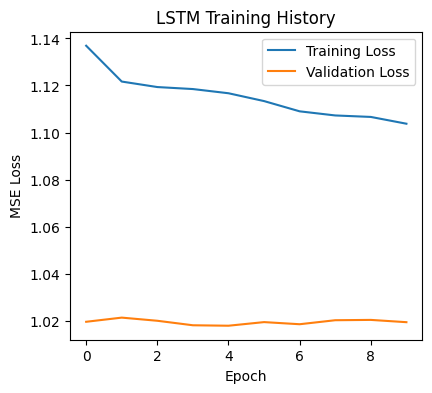

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred_lstm_subtask1 = lstm_model_subtask1.predict(X_test_padded)#prediction start during the test

mse_valence_lstm_subtask1 = mean_squared_error(y_test['valence'], y_pred_lstm_subtask1[:, 0])#mean squre error is calculated
mse_arousal_lstm_subtask1 = mean_squared_error(y_test['arousal'], y_pred_lstm_subtask1[:, 1])

print("--- LSTM Model Evaluation (Subtask 1) ---")
print(f"Mean Squared Error for Valence (LSTM): {mse_valence_lstm_subtask1:.4f}")
print(f"Mean Squared Error for Arousal (LSTM): {mse_arousal_lstm_subtask1:.4f}")

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_subtask1.history['loss'], label='Training Loss')
plt.plot(history_subtask1.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training History')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()




--- SVM Models Evaluation (Subtask 1) ---
Mean Squared Error for Valence (SVM): 1.1999
Mean Squared Error for Arousal (SVM): 0.5623


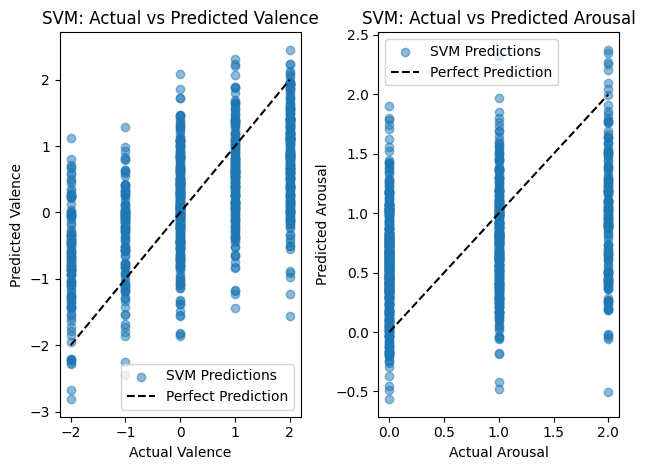

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred_valence_svm_subtask1 = svm_model_valence_subtask1.predict(X_test_combined_svm)#in svm we predict during test
y_pred_arousal_svm_subtask1 = svm_model_arousal_subtask1.predict(X_test_combined_svm)

mse_valence_svm_subtask1 = mean_squared_error(y_test['valence'], y_pred_valence_svm_subtask1)
mse_arousal_svm_subtask1 = mean_squared_error(y_test['arousal'], y_pred_arousal_svm_subtask1)

print("\n--- SVM Models Evaluation (Subtask 1) ---")
print(f"Mean Squared Error for Valence (SVM): {mse_valence_svm_subtask1:.4f}")
print(f"Mean Squared Error for Arousal (SVM): {mse_arousal_svm_subtask1:.4f}")

plt.subplot(1, 2, 1)
plt.scatter(y_test['valence'], y_pred_valence_svm_subtask1, alpha=0.5, label='SVM Predictions')
plt.plot([y_test['valence'].min(), y_test['valence'].max()],
         [y_test['valence'].min(), y_test['valence'].max()], 'k--', label='Perfect Prediction')
plt.title('SVM: Actual vs Predicted Valence')
plt.xlabel('Actual Valence')
plt.ylabel('Predicted Valence')
plt.legend()

plt.subplot(1, 2, 2) # Added for Arousal predictions
plt.scatter(y_test['arousal'], y_pred_arousal_svm_subtask1, alpha=0.5, label='SVM Predictions')
plt.plot([y_test['arousal'].min(), y_test['arousal'].max()],
         [y_test['arousal'].min(), y_test['arousal'].max()], 'k--', label='Perfect Prediction')
plt.title('SVM: Actual vs Predicted Arousal')
plt.xlabel('Actual Arousal')
plt.ylabel('Predicted Arousal')
plt.legend()

plt.tight_layout()
plt.show()

## Subtask 2A: Build and Train LSTM Model for State Change


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

lstm_model_subtask2a = Sequential([
    Embedding(input_dim=vocab_size_subtask2a, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    LSTM(128),
    Dense(64, activation='relu'),
    Dense(2)
])

lstm_model_subtask2a.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mean_squared_error']
)

lstm_model_subtask2a.summary()

print("\nTraining LSTM model for Subtask 2A...")
history_subtask2a = lstm_model_subtask2a.fit(
    X_train_2a_padded,
    y_train_2a,
    epochs=10,
    validation_data=(X_val_2a_padded, y_val_2a),
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Training LSTM model for Subtask 2A...
Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 216ms/step - loss: 1.5634 - mean_squared_error: 1.5634 - val_loss: 1.2949 - val_mean_squared_error: 1.2949
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 208ms/step - loss: 1.5644 - mean_squared_error: 1.5644 - val_loss: 1.2952 - val_mean_squared_error: 1.2952
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 173ms/step - loss: 1.5633 - mean_squared_error: 1.5633 - val_loss: 1.2945 - val_mean_squared_error: 1.2945
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 209ms/step - loss: 1.5585 - mean_squared_error: 1.5585 - val_loss: 1.2928 - val_mean_squared_error: 1.2928
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 184ms/step - loss: 1.5669 - mean_squared_error: 1.5669 - val_loss: 1.3027 - val_mean_squared_error: 1.3027
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 195ms/step - loss: 1.5482 - mean_squared_error: 1.5482 - val_loss: 1.3006 - val_mean_squared_error: 1.3006
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 208ms/step - loss: 1.5433 - me

# Build and train SVM models for Subtask 2A


In [ ]:
from sklearn.svm import SVR

svm_model_valence_subtask2a = SVR(kernel='linear')
svm_model_arousal_subtask2a = SVR(kernel='linear')
#train for subtask 2a svr both valence and arousal
svm_model_valence_subtask2a.fit(X_train_2a_combined_svm, y_train_2a['state_change_valence'])
svm_model_arousal_subtask2a.fit(X_train_2a_combined_svm, y_train_2a['state_change_arousal'])


SVR(kernel='linear')

# Evaluate the trained LSTM and SVM models for Subtask 2A on their respective test sets


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step
--- LSTM Model Evaluation (Subtask 2A) ---
Mean Squared Error for State Change Valence (LSTM): 2.3499
Mean Squared Error for State Change Arousal (LSTM): 0.7820


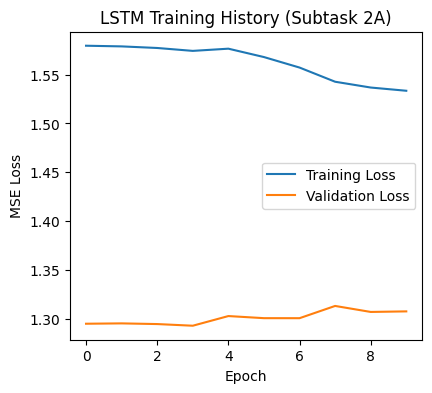

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred_lstm_subtask2a = lstm_model_subtask2a.predict(X_test_2a_padded)

mse_valence_lstm_subtask2a = mean_squared_error(y_test_2a['state_change_valence'].dropna(), y_pred_lstm_subtask2a[~np.isnan(y_test_2a['state_change_valence'].values), 0])
mse_arousal_lstm_subtask2a = mean_squared_error(y_test_2a['state_change_arousal'].dropna(), y_pred_lstm_subtask2a[~np.isnan(y_test_2a['state_change_arousal'].values), 1])

print("--- LSTM Model Evaluation (Subtask 2A) ---")
print(f"Mean Squared Error for State Change Valence (LSTM): {mse_valence_lstm_subtask2a:.4f}")
print(f"Mean Squared Error for State Change Arousal (LSTM): {mse_arousal_lstm_subtask2a:.4f}")

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_subtask2a.history['loss'], label='Training Loss')
plt.plot(history_subtask2a.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training History (Subtask 2A)')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()



--- SVM Models Evaluation (Subtask 2A) ---
Mean Squared Error for State Change Valence (SVM): 2.2878
Mean Squared Error for State Change Arousal (SVM): 0.8676


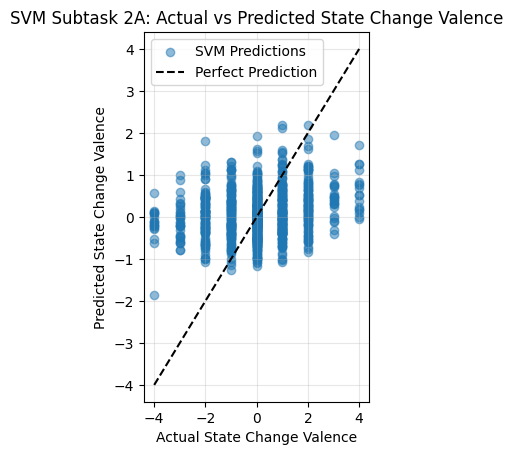

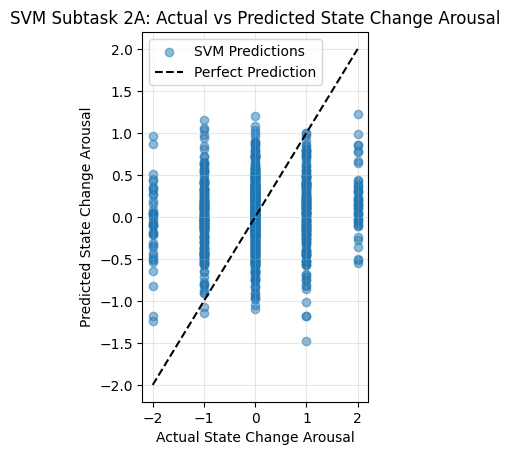

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred_valence_svm_subtask2a = svm_model_valence_subtask2a.predict(X_test_2a_combined_svm)

y_pred_arousal_svm_subtask2a = svm_model_arousal_subtask2a.predict(X_test_2a_combined_svm)
# since there are NaNs values an we need the rows with text, only the ones with text will be filtred and used for evaluation=dropna helps with
y_test_2a_valence_nonan = y_test_2a['state_change_valence'].dropna()
y_test_2a_arousal_nonan = y_test_2a['state_change_arousal'].dropna()

valid_valence_indices = y_test_2a['state_change_valence'].dropna().index
valid_arousal_indices = y_test_2a['state_change_arousal'].dropna().index

y_pred_valence_svm_subtask2a_filtered = pd.Series(y_pred_valence_svm_subtask2a, index=X_test_2a.index).loc[valid_valence_indices].values# Filter SVM predictions based on the indices of non-NaN target values
y_pred_arousal_svm_subtask2a_filtered = pd.Series(y_pred_arousal_svm_subtask2a, index=X_test_2a.index).loc[valid_arousal_indices].values

mse_valence_svm_subtask2a = mean_squared_error(y_test_2a_valence_nonan, y_pred_valence_svm_subtask2a_filtered)
mse_arousal_svm_subtask2a = mean_squared_error(y_test_2a_arousal_nonan, y_pred_arousal_svm_subtask2a_filtered)

print("\n--- SVM Models Evaluation (Subtask 2A) ---")
print(f"Mean Squared Error for State Change Valence (SVM): {mse_valence_svm_subtask2a:.4f}")
print(f"Mean Squared Error for State Change Arousal (SVM): {mse_arousal_svm_subtask2a:.4f}")

plt.subplot(1, 2, 1)
plt.scatter(y_test_2a_valence_nonan, y_pred_valence_svm_subtask2a_filtered, alpha=0.5, label='SVM Predictions')

min_val = y_test_2a_valence_nonan.min() #create prediction
max_val = y_test_2a_valence_nonan.max()
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='Perfect Prediction')

plt.title('SVM Subtask 2A: Actual vs Predicted State Change Valence')
plt.xlabel('Actual State Change Valence')
plt.ylabel('Predicted State Change Valence')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

plt.subplot(1, 2, 1)
plt.scatter(y_test_2a_arousal_nonan, y_pred_arousal_svm_subtask2a_filtered, alpha=0.5, label='SVM Predictions')
min_val = y_test_2a_arousal_nonan.min()
max_val = y_test_2a_arousal_nonan.max()
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='Perfect Prediction')

plt.title('SVM Subtask 2A: Actual vs Predicted State Change Arousal')
plt.xlabel('Actual State Change Arousal')
plt.ylabel('Predicted State Change Arousal')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# Build an LSTM model for Subtask 2B



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

lstm_model_subtask2b = Sequential([
    Embedding(input_dim=vocab_size_subtask2b, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH_2B),
    LSTM(128),
    Dense(64, activation='relu'),
    Dense(2)
])

lstm_model_subtask2b.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mean_squared_error']
)

lstm_model_subtask2b.summary()

print("\nTraining LSTM model for Subtask 2B...")
history_subtask2b = lstm_model_subtask2b.fit(
    X_train_2b_padded,
    y_train_2b,
    epochs=10,
    validation_data=(X_val_2b_padded, y_val_2b),
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Training LSTM model for Subtask 2B...
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - loss: 0.6500 - mean_squared_error: 0.6500 - val_loss: 0.7925 - val_mean_squared_error: 0.7925
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - loss: 0.6423 - mean_squared_error: 0.6423 - val_loss: 0.7996 - val_mean_squared_error: 0.7996
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 24s 7s/step - loss: 0.6438 - mean_squared_error: 0.6438 - val_loss: 0.7967 - val_mean_squared_error: 0.7967
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - loss: 0.6430 - mean_squared_error: 0.6430 - val_loss: 0.7923 - val_mean_squared_error: 0.7923
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - loss: 0.6421 - mean_squared_error: 0.6421 - val_loss: 0.7905 - val_mean_squared_error: 0.7905
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - loss: 0.6420 - mean_squared_error: 0.6420 - val_loss: 0.7912 - val_mean_squared_error: 0.7912
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - loss: 0.6423 - mean_squared_error: 0.6423 - val_

#Build SVM for subtask 2b



In [ ]:
from sklearn.svm import SVR

svm_model_valence_subtask2b = SVR(kernel='linear')
svm_model_arousal_subtask2b = SVR(kernel='linear')

#train svr fpr subtask 2b
svm_model_valence_subtask2b.fit(X_train_2b_combined_svm, y_train_2b['disposition_change_valence'])
svm_model_arousal_subtask2b.fit(X_train_2b_combined_svm, y_train_2b['disposition_change_arousal'])


SVR(kernel='linear')

#Evaluate LSTM and SVM for subtask 2b


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 539ms/step
--- LSTM Model Evaluation (Subtask 2B) ---
Mean Squared Error for Disposition Change Valence (LSTM): 0.6684
Mean Squared Error for Disposition Change Arousal (LSTM): 0.3929


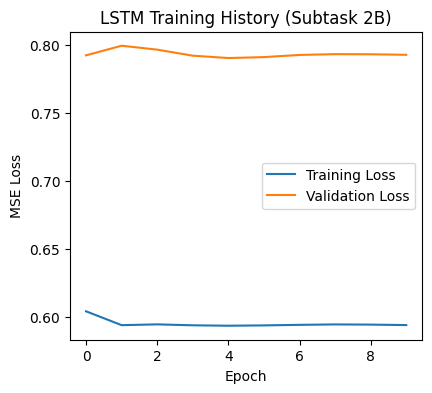

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred_lstm_subtask2b = lstm_model_subtask2b.predict(X_test_2b_padded)

mse_valence_lstm_subtask2b = mean_squared_error(y_test_2b['disposition_change_valence'], y_pred_lstm_subtask2b[:, 0])
mse_arousal_lstm_subtask2b = mean_squared_error(y_test_2b['disposition_change_arousal'], y_pred_lstm_subtask2b[:, 1])

print("--- LSTM Model Evaluation (Subtask 2B) ---")
print(f"Mean Squared Error for Disposition Change Valence (LSTM): {mse_valence_lstm_subtask2b:.4f}")
print(f"Mean Squared Error for Disposition Change Arousal (LSTM): {mse_arousal_lstm_subtask2b:.4f}")
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_subtask2b.history['loss'], label='Training Loss')
plt.plot(history_subtask2b.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training History (Subtask 2B)')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()


---  SVM Models Evaluation (Subtask 2B) ---
Mean Squared Error for Disposition Change Valence (Tuned SVM): 0.7645
Mean Squared Error for Disposition Change Arousal (Tuned SVM): 0.4113


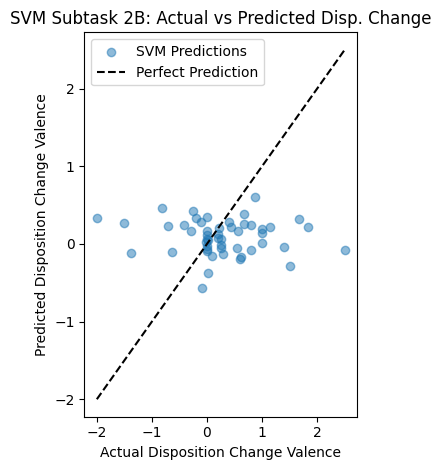

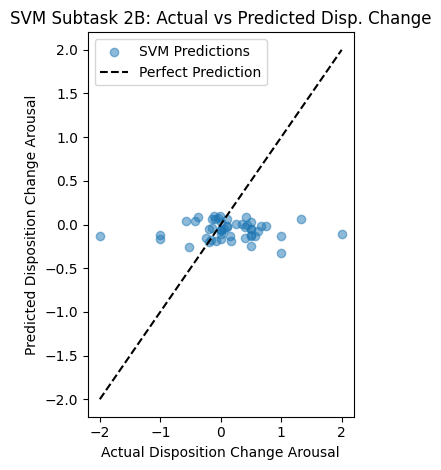

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred_valence_svm_subtask2b = svm_model_valence_subtask2b.predict(X_test_2b_combined_svm)

y_pred_arousal_svm_subtask2b = svm_model_arousal_subtask2b.predict(X_test_2b_combined_svm)

mse_valence_svm_subtask2b = mean_squared_error(y_test_2b['disposition_change_valence'], y_pred_valence_svm_subtask2b)
mse_arousal_svm_subtask2b= mean_squared_error(y_test_2b['disposition_change_arousal'], y_pred_arousal_svm_subtask2b)

print("\n---  SVM Models Evaluation (Subtask 2B) ---")
print(f"Mean Squared Error for Disposition Change Valence (Tuned SVM): {mse_valence_svm_subtask2b:.4f}")
print(f"Mean Squared Error for Disposition Change Arousal (Tuned SVM): {mse_arousal_svm_subtask2b:.4f}")

plt.subplot(1, 2, 1)
plt.scatter(y_test_2b['disposition_change_valence'], y_pred_valence_svm_subtask2b, alpha=0.5, label='SVM Predictions')
min_val = y_test_2b['disposition_change_valence'].min()
max_val = y_test_2b['disposition_change_valence'].max()

plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='Perfect Prediction')

plt.title('SVM Subtask 2B: Actual vs Predicted Disp. Change')
plt.xlabel('Actual Disposition Change Valence')
plt.ylabel('Predicted Disposition Change Valence')
plt.legend()

plt.tight_layout()
plt.show()

plt.subplot(1, 2, 1)
plt.scatter(y_test_2b['disposition_change_arousal'], y_pred_arousal_svm_subtask2b, alpha=0.5, label='SVM Predictions')
min_val = y_test_2b['disposition_change_arousal'].min()
max_val = y_test_2b['disposition_change_arousal'].max()

plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='Perfect Prediction')

plt.title('SVM Subtask 2B: Actual vs Predicted Disp. Change')
plt.xlabel('Actual Disposition Change Arousal')
plt.ylabel('Predicted Disposition Change Arousal')
plt.legend()

plt.tight_layout()
plt.show()

## Compare and Analyze All Model Performances




In [ ]:
performance_metrics = {
    'Subtask 1': {
        'LSTM': {
            'Valence MSE': mse_valence_lstm_subtask1,
            'Arousal MSE': mse_arousal_lstm_subtask1
        },
        'SVM': {
            'Valence MSE': mse_valence_svm_subtask1,
            'Arousal MSE': mse_arousal_svm_subtask1
        }
    },
    'Subtask 2A': {
        'LSTM': {
            'State Change Valence MSE': mse_valence_lstm_subtask2a,
            'State Change Arousal MSE': mse_arousal_lstm_subtask2a
        },
        'SVM': {
            'State Change Valence MSE': mse_valence_svm_subtask2a,
            'State Change Arousal MSE': mse_arousal_svm_subtask2a
        }
    },
    'Subtask 2B': {
        'LSTM': {
            'Disposition Change Valence MSE': mse_valence_lstm_subtask2b,
            'Disposition Change Arousal MSE': mse_arousal_lstm_subtask2b
        },
        'SVM': {
            'Disposition Change Valence MSE': mse_valence_svm_subtask2b,
            'Disposition Change Arousal MSE': mse_arousal_svm_subtask2b
        }
    }
}

df_performance = pd.DataFrame.from_dict({
# Convert to DataFrame for better visualization
    (i, j): performance_metrics[i][j]
    for i in performance_metrics.keys()
    for j in performance_metrics[i].keys()
}, orient='index')

print("Performance Metrics Summary (MSE):")
print(df_performance.round(4))


Performance Metrics Summary (MSE):
                 Valence MSE  Arousal MSE  State Change Valence MSE  \
Subtask 1  LSTM       1.7634       0.5792                       NaN   
           SVM        1.1999       0.5623                       NaN   
Subtask 2A LSTM          NaN          NaN                    2.3499   
           SVM           NaN          NaN                    2.2878   
Subtask 2B LSTM          NaN          NaN                       NaN   
           SVM           NaN          NaN                       NaN   

                 State Change Arousal MSE  Disposition Change Valence MSE  \
Subtask 1  LSTM                       NaN                             NaN   
           SVM                        NaN                             NaN   
Subtask 2A LSTM                    0.7820                             NaN   
           SVM                     0.8676                             NaN   
Subtask 2B LSTM                       NaN                          0.6684   
     

# Performance




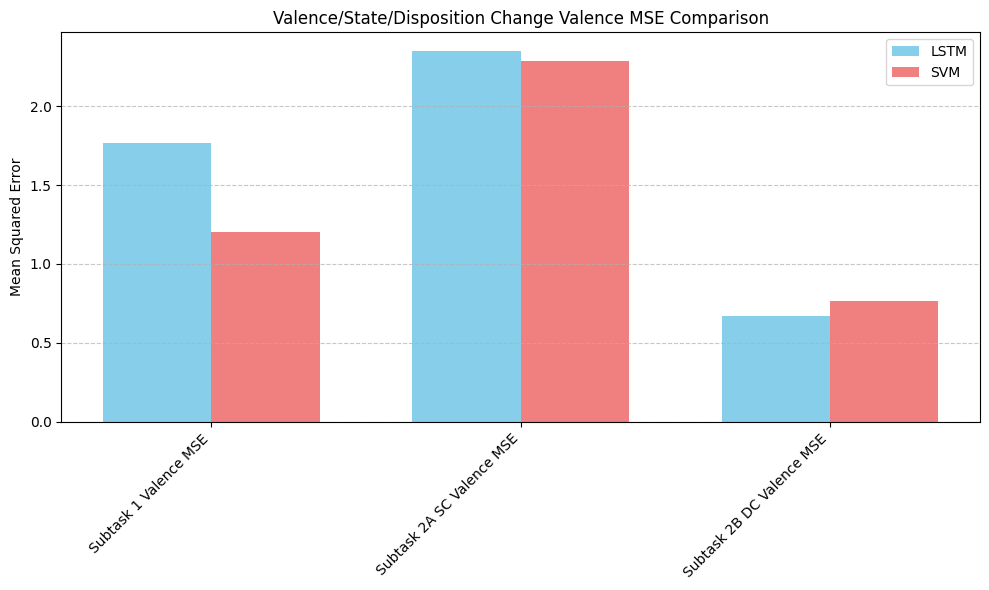

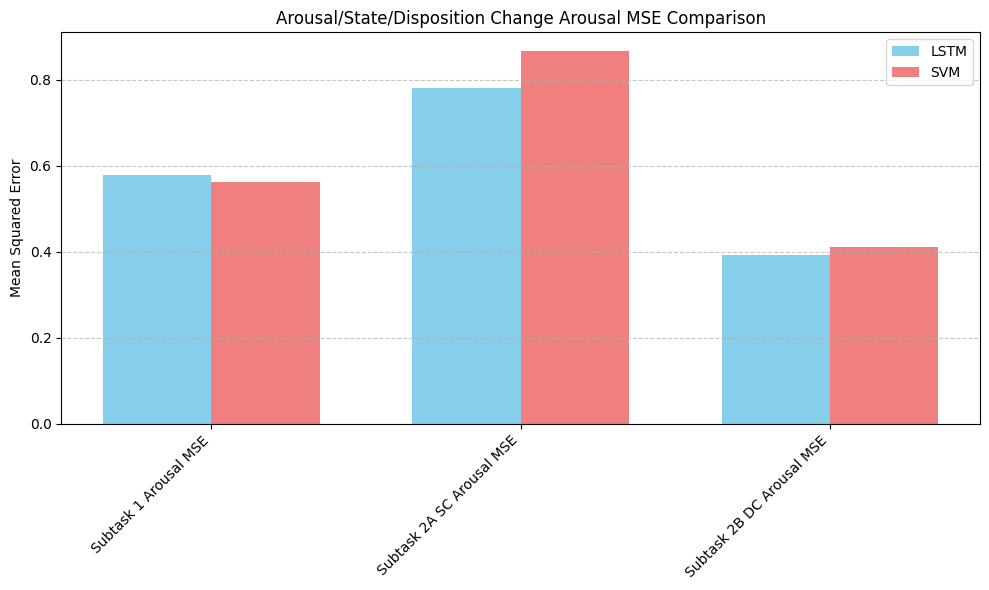

In [ ]:
import matplotlib.pyplot as plt

val_mse_lstm_subtask1 = performance_metrics['Subtask 1']['LSTM']['Valence MSE']#mse from lstm is obtaine
val_mse_lstm_subtask2a = performance_metrics['Subtask 2A']['LSTM']['State Change Valence MSE']
val_mse_lstm_subtask2b = performance_metrics['Subtask 2B']['LSTM']['Disposition Change Valence MSE']

val_mse_svm_subtask1 = performance_metrics['Subtask 1']['SVM']['Valence MSE']#also from svm we extract it
val_mse_svm_subtask2a = performance_metrics['Subtask 2A']['SVM']['State Change Valence MSE']
val_mse_svm_subtask2b = performance_metrics['Subtask 2B']['SVM']['Disposition Change Valence MSE']

labels_valence = ['Subtask 1 Valence MSE', 'Subtask 2A SC Valence MSE', 'Subtask 2B DC Valence MSE']#plotting  valence for representation (y)
lstm_valence_mses = [val_mse_lstm_subtask1, val_mse_lstm_subtask2a, val_mse_lstm_subtask2b]
svm_valence_mses = [val_mse_svm_subtask1, val_mse_svm_subtask2a, val_mse_svm_subtask2b]

x = range(len(labels_valence))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar([i - width/2 for i in x], lstm_valence_mses, width, label='LSTM', color='skyblue')
plt.bar([i + width/2 for i in x], svm_valence_mses, width, label='SVM', color='lightcoral')

plt.ylabel('Mean Squared Error')
plt.title('Valence/State/Disposition Change Valence MSE Comparison')
plt.xticks(x, labels_valence, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

arousal_mse_lstm_subtask1 = performance_metrics['Subtask 1']['LSTM']['Arousal MSE']#arousal for reoresenattion (x)
arousal_mse_lstm_subtask2a = performance_metrics['Subtask 2A']['LSTM']['State Change Arousal MSE']
arousal_mse_lstm_subtask2b = performance_metrics['Subtask 2B']['LSTM']['Disposition Change Arousal MSE']

arousal_mse_svm_subtask1 = performance_metrics['Subtask 1']['SVM']['Arousal MSE']
arousal_mse_svm_subtask2a = performance_metrics['Subtask 2A']['SVM']['State Change Arousal MSE']
arousal_mse_svm_subtask2b = performance_metrics['Subtask 2B']['SVM']['Disposition Change Arousal MSE']

labels_arousal = ['Subtask 1 Arousal MSE', 'Subtask 2A SC Arousal MSE', 'Subtask 2B DC Arousal MSE']
lstm_arousal_mses = [arousal_mse_lstm_subtask1, arousal_mse_lstm_subtask2a, arousal_mse_lstm_subtask2b]
svm_arousal_mses = [arousal_mse_svm_subtask1, arousal_mse_svm_subtask2a, arousal_mse_svm_subtask2b]

plt.figure(figsize=(10, 6))
plt.bar([i - width/2 for i in x], lstm_arousal_mses, width, label='LSTM', color='skyblue')
plt.bar([i + width/2 for i in x], svm_arousal_mses, width, label='SVM', color='lightcoral')

plt.ylabel('Mean Squared Error')
plt.title('Arousal/State/Disposition Change Arousal MSE Comparison')
plt.xticks(x, labels_arousal, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
